In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

from Models.ANNclass import ANN1

In [2]:
df = pd.read_csv(r"C:\Learn_AI\Model\ANN-IRIS\Dataset\Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- Phân phối chuẩn

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
def xuly(x): 
    if x == 'Iris-setosa': 
        return 0 
    elif x == 'Iris-versicolor':
        return 1 
    else : 
        return 2 
df['Species'] = df['Species'].apply(xuly)

In [7]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0


In [8]:
df.Species.unique()
y = df['Species']
X = df.drop(['Id', 'Species'], axis=1)

epochs: 17 <class 'int'>
batch_size: 16 <class 'int'>
X dtype: float64
y dtype: int64
Epoch 1/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3496 - loss: 1.1559 - val_accuracy: 0.3333 - val_loss: 0.9835
Epoch 2/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3632 - loss: 0.9517 - val_accuracy: 0.6667 - val_loss: 0.7459
Epoch 3/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5280 - loss: 0.7492 - val_accuracy: 0.7500 - val_loss: 0.5272
Epoch 4/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5792 - loss: 0.6334 - val_accuracy: 0.8333 - val_loss: 0.4021
Epoch 5/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7179 - loss: 0.5081 - val_accuracy: 0.9167 - val_loss: 0.3179
Epoch 6/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9268 - loss: 0.4232 - val_accuracy: 0.9583 - val_loss: 0.2592
Epoch 7/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9308 - loss: 0.3150 - val_accuracy: 0.9583 - val_loss: 0.2088
Epoch 8/17
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 

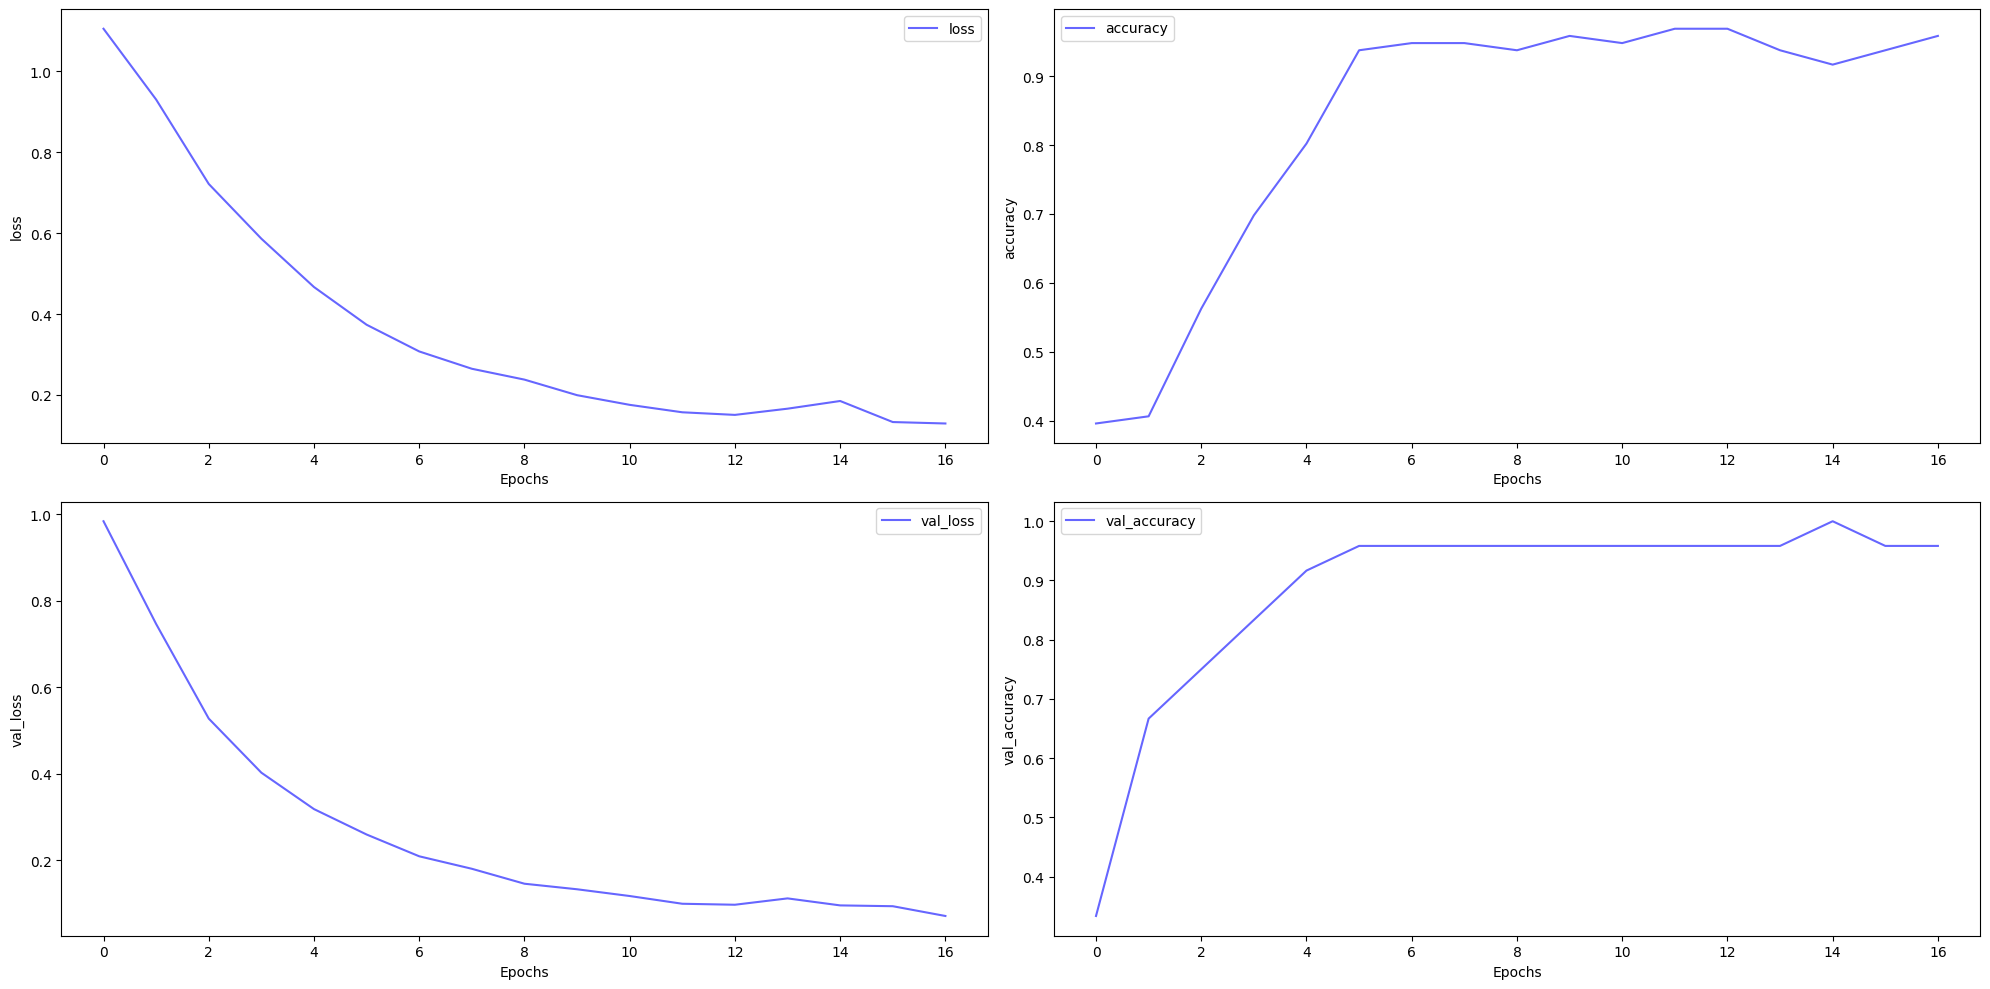

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Ép kiểu dữ liệu đúng
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Khởi tạo và huấn luyện model
ann_model = ANN1(input_shape=(X_train.shape[1],), output_shape=3, learning_rate=0.01, epochs=17, batch_size=16)
ann_model.fit(X=X_train, y=y_train)

In [16]:
y_pred_probs = ann_model.predict(X_test)  # xác suất
y_pred = np.argmax(y_pred_probs, axis=1)  # nhãn dự đoán



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


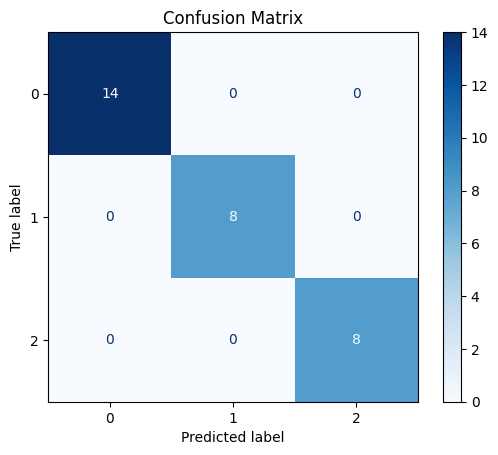

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     1.0000    1.0000    1.0000         8
           2     1.0000    1.0000    1.0000         8

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30



In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))